In [1]:
%cd "../DFungi_dataset"

c:\Users\Usuario\Documents\Universidad\Semestre 10\Computación\M2 IA\DFungi_AITraining\DFungi_dataset


In [26]:
#Imports

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from PIL import Image, UnidentifiedImageError
import io
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%cd "../DFungi_dataset"

c:\Users\Usuario\Documents\Universidad\Semestre 10\Computación\M2 IA\DFungi_AITraining\DFungi_dataset


In [27]:
# Añadir los paths de las carpetas de 'train' y 'test'
train_dir = os.path.join('train')
test_dir = os.path.join('test')

# Empezamos con generación de datos en una variable llamada 'train_datagen'.
# Entrenamos el modelo al mismo tiempo que la generación de datos para no
# perder el tiempo y hacer uso óptimo de la RAM.

# Usamos la función ImageDataGenerator de TensorFlow
train_datagen = ImageDataGenerator(
							rescale = 1./255, # Reescalamos las imágenes
							rotation_range = 10, # Las rotamos levemente (10 grados)
							width_shift_range = 0.2, # Permitimos que se ensanche la imagen
							zoom_range = 0.3, # Hacemos zoom
							horizontal_flip = True, #Volteamos la imagen
                            validation_split=0.10
                            )



Found 1944 images belonging to 3 classes.


<Figure size 640x480 with 0 Axes>

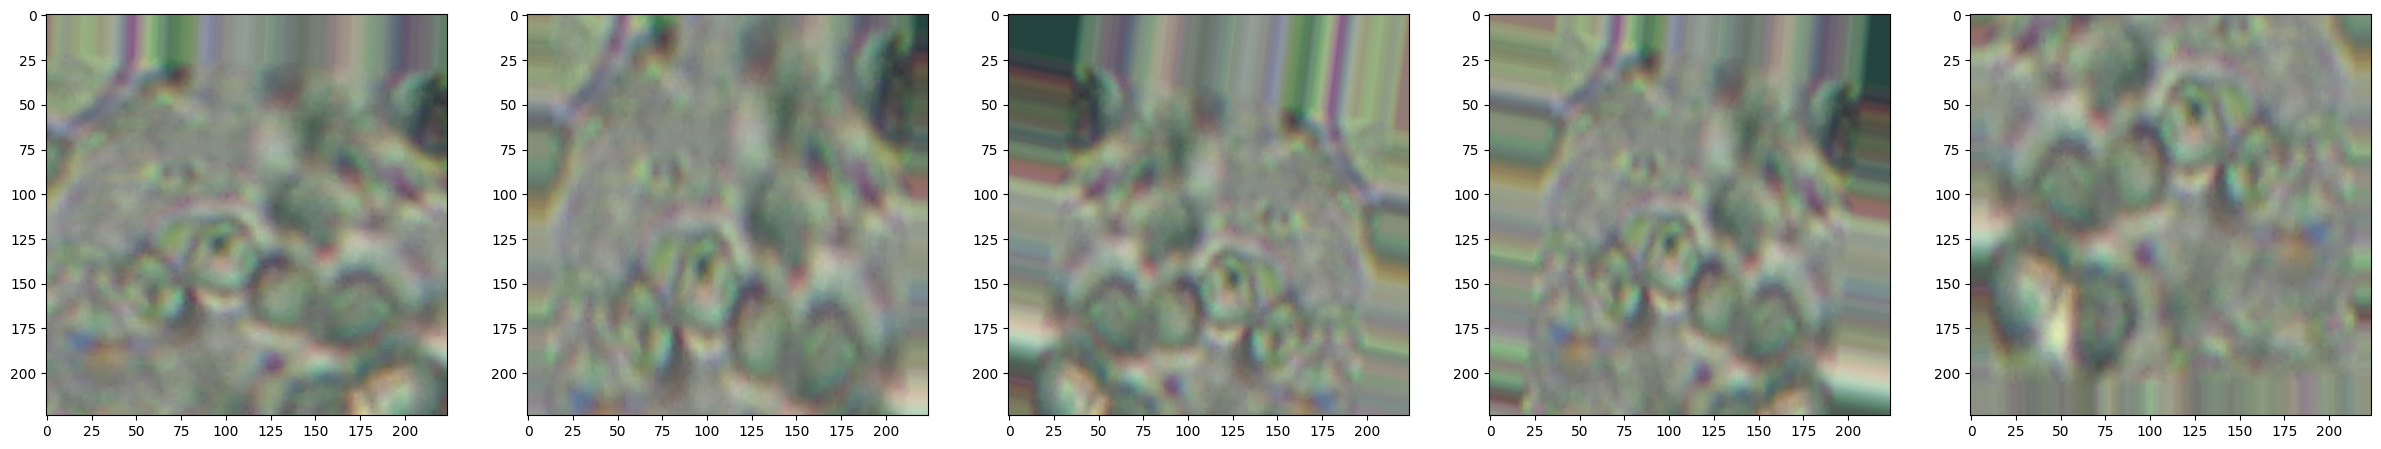

In [28]:
# TRAINING (DE PRUEBA)
# Alimentamos los datos nuevos de 'train_datagen' a la función 'flow_from_directory'
# de TensorFlow
train_generator = train_datagen.flow_from_directory(
							train_dir, # le damos el path de entrenamiento
							target_size = (224, 224), # Tamaño de las imágenes según VGG16
							# batch_size = 1 porque la RAM es un relajo XD
							subset='training',
							batch_size = 1, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

# Creamos el formato del plot para mostrar las imágenes
plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

# Mostrar las primeras 5
for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

In [29]:
# VALIDATION
# Alimentamos los datos nuevos de 'train_datagen' a la función 'flow_from_directory'
# de TensorFlow
validation_generator = train_datagen.flow_from_directory(
							train_dir, # le damos el path de entrenamiento
							target_size = (224, 224), # Tamaño de las imágenes según VGG16
							# batch_size = 1 porque la RAM es un relajo XD
							subset='validation',
							batch_size = 1, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

# TEST
#Un rápido pre-procesamiento de datos
test_datagen = ImageDataGenerator(rescale=1./255) #Reescalamos las imágenes de test

# Alimentamos los datos nuevos de 'train_datagen' a la función 'flow_from_directory'
# de TensorFlow
test_generator = test_datagen.flow_from_directory(
							test_dir, # le damos el path de test
							target_size = (224, 224), # Tamaño de las imágenes según VGG16
							# batch_size = 1 porque la RAM es un relajo XD
							batch_size = 1, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

Found 214 images belonging to 3 classes.


Found 1119 images belonging to 3 classes.


Found 2158 images belonging to 3 classes.
(8, 224, 224, 3)
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


<Figure size 640x480 with 0 Axes>

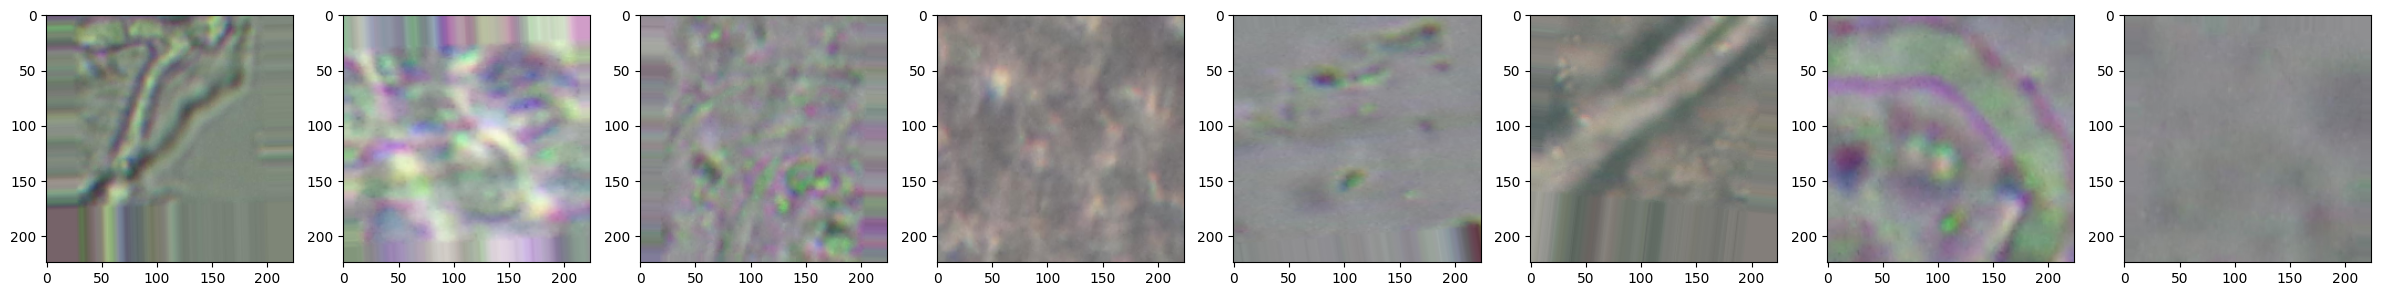

In [30]:
# TRAINING (OFICIAL)
train_generator = train_datagen.flow_from_directory(
							train_dir,# le damos el path de entrenamiento
							target_size = (224, 224), # Tamaño de las imágenes según VGG16
							batch_size = 8, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [ ]:
# Path de los contenidos del dataset
path = "../DFungi_dataset"
sample_augmented_dir = os.path.join(path, 'augmented_samples_limited') # Directory for limited samples

# Ensure the sample directory exists
if not os.path.exists(sample_augmented_dir):
    os.makedirs(sample_augmented_dir)
    print(f"Created directory for limited augmented samples: {sample_augmented_dir}")


# --- Part 1: Save a limited number of augmented images for inspection ---
print("Generating and saving a limited number of augmented image samples...")
saving_batch_size = 32  # You can adjust this batch size for saving
num_images_to_save_target = 300

# Create a temporary generator to save some images from the 'training' subset
# If your train_datagen does NOT have validation_split defined, remove subset='training'
temp_sampler_generator = train_datagen.flow_from_directory(
    "../DFungi_dataset/train",
    target_size=(224, 224),
    batch_size=saving_batch_size,
    class_mode='categorical',
    save_to_dir=sample_augmented_dir,
    save_prefix='aug_sample',
    save_format='png',
    subset='training', # Use 'training' if validation_split is in train_datagen
    shuffle=False # Keep shuffle=False for consistent sample generation
)

# Calculate number of batches to generate to save AT MOST num_images_to_save_target
num_batches_to_generate_for_saving = num_images_to_save_target // saving_batch_size
if num_batches_to_generate_for_saving == 0 and num_images_to_save_target > 0: # If target < batch_size, save 1 batch
    num_batches_to_generate_for_saving = 1

images_generated_for_saving = 0
print(f"Will generate {num_batches_to_generate_for_saving} batches for saving (batch size: {saving_batch_size}).")
for i in range(num_batches_to_generate_for_saving):
    try:
        _, _ = next(temp_sampler_generator) # Fetch a batch to trigger saving
        images_generated_for_saving += saving_batch_size
        print(f"Generated batch {i+1}/{num_batches_to_generate_for_saving} for saving.")
        if images_generated_for_saving >= num_images_to_save_target:
            break 
    except StopIteration:
        print("Reached end of dataset while saving samples.")
        break
actual_saved_count = min(images_generated_for_saving, num_images_to_save_target, temp_sampler_generator.samples if hasattr(temp_sampler_generator, 'samples') else float('inf'))
print(f"Finished saving sample images to {sample_augmented_dir}.")
print(f"Approximately {actual_saved_count} images should be in the directory (or fewer if the dataset subset is smaller).")

# --- Part 2: Define the main train_generator for model training (WITHOUT saving) ---
# This 'train_generator' will be used in model.fit()
print("\nDefining main 'train_generator' for model training (will NOT save images)...")
train_generator = train_datagen.flow_from_directory(
    "../DFungi_dataset/train",
    target_size=(224, 224),
    batch_size=64,  # Your original batch size for training
    class_mode='categorical',
    subset='training', # Crucial if train_datagen has validation_split
    shuffle=True # Shuffle is generally good for training
    # NO save_to_dir, save_prefix, save_format here!
)
print(f"Training generator ready: {train_generator.samples} training images found (after split), batch size {train_generator.batch_size}.")

# Also, ensure your validation_generator (used in model.fit) is defined correctly
# without saving and using the 'validation' subset.
# This might be defined in cell c252489e, or you can redefine/confirm it here.
# For example:
if train_datagen.validation_split > 0:
    print("\nDefining main 'validation_generator' for model training (will NOT save images)...")
    validation_generator = train_datagen.flow_from_directory(
        "../DFungi_dataset/train",
        target_size=(224, 224),
        batch_size=64, # Or your preferred validation batch size
        class_mode='categorical',
        subset='validation', # Crucial for validation data
        shuffle=False # No need to shuffle validation data
        # NO save_to_dir here!
    )
    print(f"Validation generator ready: {validation_generator.samples} validation images found (after split).")
else:
    validation_generator = None # Or load from a separate test_dir if no validation_split
    print("\nNote: 'validation_split' may not be set in train_datagen, so 'validation_generator' from training data is not created here.")

# Now, when you call model.fit(train_generator, validation_data=validation_generator, ...),
# it will use on-the-fly augmentation for training and validation without continuously saving images to disk.
# The directory specified in your original code (path + '/augmented') will no longer be automatically populated by this setup
# unless you explicitly create another generator that saves there.

Found 2158 images belonging to 3 classes.


In [ ]:
# Inicio de la red neuronal convolutiva
# Inspirada en la arquitectura RGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

input_shape = (224, 224, 3)  # Tamaño de entrada de las imágenes según VGG16

# Load VGG16 with pre-trained ImageNet weights, excluding the top (classifier) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze base model layers so they are not trained
base_model.trainable = False

# Unfreeze some of the top layers
# For VGG16, 'block5_conv1' onwards are typically good candidates for unfreezing
# You can print base_model.summary() to see all layer names
for layer in base_model.layers:
    if layer.name.startswith('block5'): # Unfreeze layers in block5
        layer.trainable = True

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Optional: add more dense layers
model.add(layers.Dense(3, activation='softmax'))

model.summary()

# Compilar el modelo
model.compile(loss='categorical_crossentropy', # Categorical Crossentropy for multi-class classification with one-hot labels
						optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
						metrics=['accuracy']) # Accuracy to evaluate performance


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,467 (68.38 MB)

 Trainable params: 3,211,779 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# ESTA REVISIÓN DE ARCHIVOS FUE HECHA POR GEMINI AI PARA REVISAR LOS ARCHIVOS
# UNO POR UNO DEBIDO A QUE SALÍA UN ERROR DONDE NO SE PODÍA ENTRENAR EL MODELO
# POR QUE LOS ARCHIVOS ESTABAN O CORRUPTOS, O INCORRECTOS. TRAS CONSULTAR CON LA
# IA CÓMO REVISAR MIS DOCUMENTOS, HIZO PROPUESTA DE UN DEBUGGING REVISANDO SI
# ALGUNO DE LOS ARCHIVOS ESTABA CAUSANDO EL PROBLEMA. ENCONTRÓ UNA IMAGEN
# CORRUPTA DE ENTRE 9000. TRAS ELIMINARLA, EL MODELO ENTRENÓ SIN PROBLEMA. SIN
# EMBARGO, EXPLICO EL CÓDIGO DEL SIGUIENTE BLOQUE CON MIS PALABRAS.

# Inicializar array con los paths que se tienen que revisar.
image_paths_to_check = []

# 'walk' a través de la carpeta del dataset
for root, _, files in os.walk("../DFungi_dataset"):
    for file in files: # por cada archivo en la carpeta
        # si la imagen termina con alguno de los formatos de imagen...
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            # ... se añade el path del archivo al array paths_to_check
            image_paths_to_check.append(os.path.join(root, file))

# Compartir mensaje de la cantidad de imágenes que se están analizando
print(f"Checking {len(image_paths_to_check)} potential image files...")

# Inizializar array para guardar los paths problemáticos (en caso de haberlos)
problematic_files = []

# Para cada archivo en paths_to_check
for img_path in image_paths_to_check:
    try:
        # Abrir y leer el archivo
        with open(img_path, 'rb') as f:
            img_bytes = f.read()
        Image.open(io.BytesIO(img_bytes))
    # Si hay un error y no puede abrirlo
    except UnidentifiedImageError:
        # Añadir el path al array problematic_files
        problematic_files.append(img_path)
        # Imprimir mensaje de error
        print(f"ERROR: Could not identify image file: {img_path}")
    except Exception as e:
        print(f"OTHER ERROR for {img_path}: {e}")

# Si hubo archivos problemáticos, se imprimen en resumen
if problematic_files:
    print("\n--- Summary of Problematic Files ---")
    for p_file in problematic_files:
        print(p_file)
else:
    # Si no hubo, imprime un mensaje de éxito
    print("\nSuccess! No problematic image files found during manual check.")


Checking 9221 potential image files...

No problematic image files found during manual check.


In [38]:
# Entrenar el modelo
history = model.fit(
						train_generator,
						epochs = 20,
                        validation_data = validation_generator,
						)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 535s 16s/step - accuracy: 0.3814 - loss: 2.2347 - val_accuracy: 0.3645 - val_loss: 1.2240
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 551s 16s/step - accuracy: 0.5027 - loss: 0.9545 - val_accuracy: 0.3785 - val_loss: 1.1159
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 552s 16s/step - accuracy: 0.5406 - loss: 0.9494 - val_accuracy: 0.3411 - val_loss: 1.1472
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 554s 16s/step - accuracy: 0.5345 - loss: 0.8920 - val_accuracy: 0.4673 - val_loss: 1.1258
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 552s 16s/step - accuracy: 0.5705 - loss: 0.8952 - val_accuracy: 0.3645 - val_loss: 1.1832
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 551s 16s/step - accuracy: 0.5624 - loss: 0.8795 - val_accuracy: 0.2991 - val_loss: 1.1766
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 570s 17s/step - accuracy: 0.5379 - loss: 0.8672 - val_accuracy: 0.3925 - val_loss: 1.1244
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 556s 16s/step - accuracy: 0.5819 - loss: 0.8454 - val_accuracy: 0.

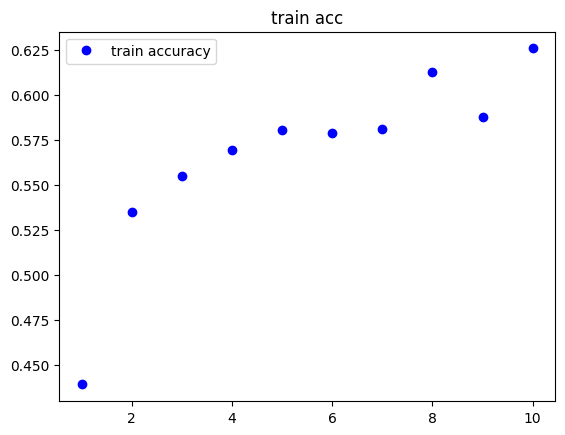

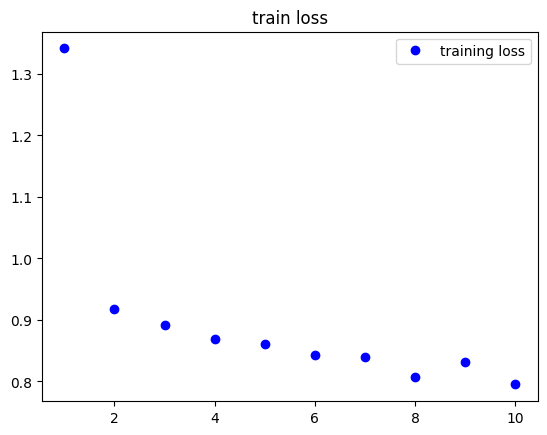

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [23]:
# Evaluar el modelo usando la selección de imágenes en test
test_loss, test_accuracy = model.evaluate(test_generator)
# Imprimir accuracy con info de test
print(f"Test Accuracy: {test_accuracy}")

1119/1119 ━━━━━━━━━━━━━━━━━━━━ 403s 361ms/step - accuracy: 0.4449 - loss: 1.2376
Test Accuracy: 0.43431636691093445


              precision    recall  f1-score   support

          H1       0.42      0.35      0.38       483
          H2       0.41      0.35      0.38       474
          H3       0.12      0.22      0.15       162

    accuracy                           0.33      1119
   macro avg       0.32      0.31      0.30      1119
weighted avg       0.37      0.33      0.35      1119



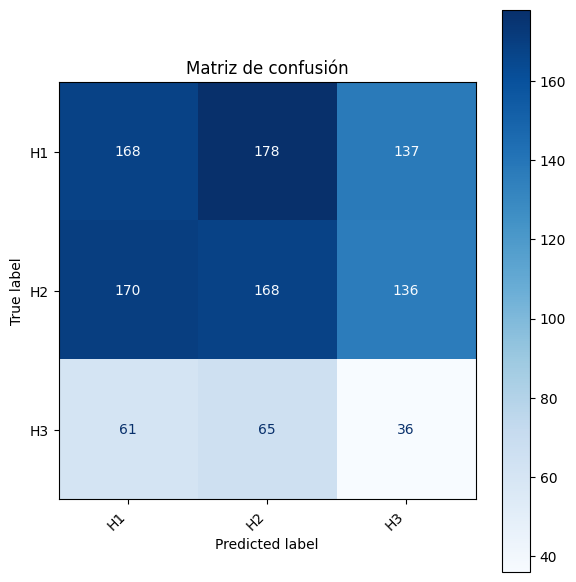

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# CONFUSION MATRIX

# Y_TRUE Classes de generador
y_true = test_generator.classes
# Y_PRED Predicciones por imagen
y_pred = np.argmax(model.predict(test_generator, verbose=0), axis=1)
# LABELS claves de las clases
labels = list(test_generator.class_indices.keys())

# Crear la matriz de confusión para comparar predicción contra realidad
confusion_matrixx = confusion_matrix(y_true, y_pred) # X=Clase a la que pertenece Y=Predicción del modelo
# Imprimir el reporte con los datos del modelo (métricas de precisión, recall, f1 y support)
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
# Display
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrixx, display_labels=labels)

# Formato del plot
plt.figure(figsize=(6, 6))
disp.plot(include_values=True, cmap=plt.cm.Blues, ax=plt.gca(), colorbar=True)
plt.title("Matriz de confusión")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [3]:
import json
# Guardar las clases en un json
json.dump(train_generator.class_indices, open('class_indices.json', 'w'))
# Guardar el modelo
model.save('model.keras')

NameError: name 'train_generator' is not defined

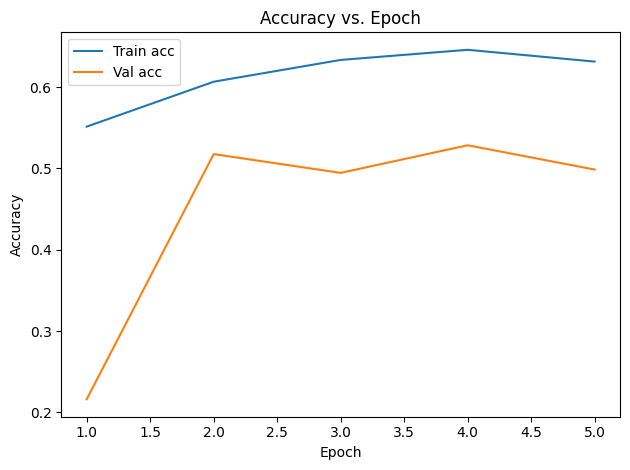

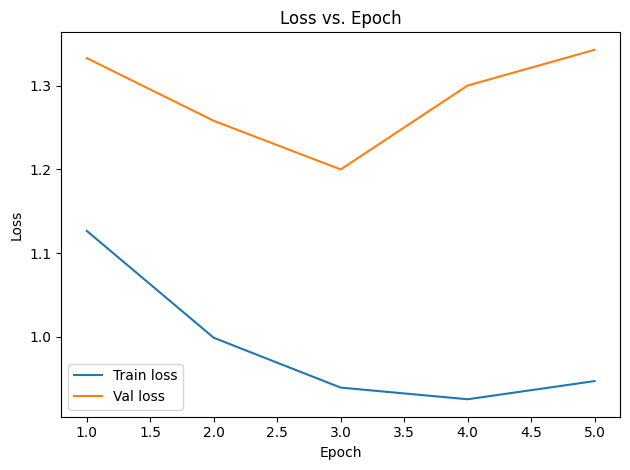

In [ ]:
# Graficar la historia del entrenamiento
acc  = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

# Evaluación del modelo Accuracy vs. Epoch
plt.figure()
plt.plot(epochs, acc,     label="Train acc")
plt.plot(epochs, val_acc, label="Val acc")
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()
plt.tight_layout()
plt.show()

# Evaluación del modelo Loss vs. Epoch
plt.figure()
plt.plot(epochs, loss,     label="Train loss")
plt.plot(epochs, val_loss, label="Val loss")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.tight_layout()
plt.show()

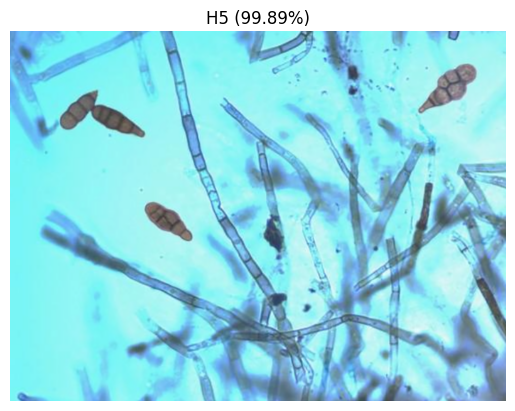

In [6]:
from pathlib import Path
import json

# Variables del Path del modelo y del diccionario de clases
model_path   = Path("../DFungi_dataset/model.keras") #Dónde está el modelo previamente guardado.
classes_path = Path("../DFungi_dataset/class_indices.json") #Dónde está el diccionario de clases del modelo.

# Cargar el modelo
model = tf.keras.models.load_model(model_path)
# Cargar las etiquetas y clases que están en el diccionario.
idx2class = {v: k for k, v in json.load(classes_path.open()).items()}

# Función auxiliar para pre-procesar y predecir
# DESARROLLADA EN APOYO DE LEONARDO SANTIAGO RAMOS (AUTOR ORIGINAL)
def predict_image(img_path): #parámetro de entrada: path de la imagen a evaluar

    # Preprocesamos la imagen para que cumpla los requisitos de la arquitectura del modelo
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224)) # Cargamos imagen y le damos el tamaño estándar
    x   = tf.keras.utils.img_to_array(img) / 255.0 # Reescalamos la imagen
    x   = np.expand_dims(x, 0)

    preds = model.predict(x, verbose=0) # Ejecutamos el modelo
    class_id = int(np.argmax(preds)) # Alimentamos las clases
    conf     = float(np.max(preds))

    return idx2class[class_id], conf, preds[0]

img_path = Path("../Avance2/f.png") # Path de la imagen a probar

assert img_path.exists(), f"No se encontró {img_path}" # Manejo de errores, si no encuentra el archivo

predicted_class, confidence, prob_vector = predict_image(img_path) # Ejecutamos la función con la imagen

# Mostramos los resultados del predict
plt.imshow(tf.keras.utils.load_img(img_path))
plt.axis("off")
# Que muestre cuál es la clase que se entiende que es y el porcentaje (con 2 decimales) de seguridad
plt.title(f"{predicted_class} ({confidence:.2%})")
plt.show()